In [1]:
from google.colab import drive
# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.express as px
from IPython.display import display
import os

In [96]:
base_directory = '/content/drive/MyDrive'
# Load dataset
print("\n1. Loading and Preparing Dataset...")
dataset_path = os.path.join(base_directory, 'FYP_Data_PipeLine/BTC_1d.csv')
maindf = pd.read_csv(dataset_path)
model_name = os.path.splitext(os.path.basename(dataset_path))[0]
print(f"\nModel Name: {model_name}")


1. Loading and Preparing Dataset...

Model Name: BTC_1d


In [97]:
print("\nDataset Overview:")
display(maindf.head())
print(f"\nDataset Shape: {maindf.shape}")
# Display dataset info
print("\nDataset Information:")
display(maindf.info())

# Display basic statistics
print("\nBasic Statistics:")
display(maindf.describe())

# Check for null values
print("\nNull Value Check:")
null_df = pd.DataFrame({
    'Column': maindf.columns,
    'Null Count': maindf.isnull().sum(),
    'Null Percentage': (maindf.isnull().sum() / len(maindf) * 100).round(2)
})
display(null_df)


Dataset Overview:


,Open Time,Open,High,Low,Close,Quote Asset Volume,Open Interest (USD),LSRatio,FearGreedIndex,TwitterIndex
0,2024-07-18 00:00:00,64055.8,65173.8,63206.4,63959.9,1.384049e+10,1.722490e+09,1.1749,61.0,50.0
1,2024-07-19 00:00:00,63960.0,67362.8,63266.2,66627.9,2.038065e+10,1.857913e+09,1.2257,60.0,50.0
2,2024-07-20 00:00:00,66627.9,67648.7,66159.1,67095.6,8.257378e+09,1.953121e+09,1.1200,74.0,50.0
3,2024-07-21 00:00:00,67095.6,68351.2,65750.0,68138.0,1.391146e+10,1.959401e+09,1.1492,74.0,50.0
4,2024-07-22 00:00:00,68138.0,68459.7,66538.6,67499.2,1.302388e+10,1.868375e+09,1.1664,70.0,50.0



Dataset Shape: (183, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open Time            183 non-null    object 
 1   Open                 183 non-null    float64
 2   High                 183 non-null    float64
 3   Low                  183 non-null    float64
 4   Close                183 non-null    float64
 5   Quote Asset Volume   183 non-null    float64
 6   Open Interest (USD)  183 non-null    float64
 7   LSRatio              183 non-null    float64
 8   FearGreedIndex       183 non-null    float64
 9   TwitterIndex         183 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.4+ KB


None


Basic Statistics:


,Open,High,Low,Close,Quote Asset Volume,Open Interest (USD),LSRatio,FearGreedIndex,TwitterIndex
count,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,183.000000,183.000000,183.0
mean,75528.900546,77143.359563,74062.913115,75747.004372,1.867874e+10,2.092485e+09,1.189135,60.382514,50.0
std,16615.451072,16986.947336,16301.435163,16726.584699,1.015117e+10,6.505756e+08,0.080498,19.624948,0.0
min,53927.700000,54820.200000,48888.000000,53927.700000,4.066498e+09,1.145944e+09,1.024300,17.000000,50.0
25%,61301.850000,62489.000000,60093.000000,61301.850000,1.266600e+10,1.608419e+09,1.126300,48.000000,50.0
50%,67499.200000,68400.000000,66538.600000,67592.000000,1.717778e+10,1.959401e+09,1.193000,69.000000,50.0
75%,94628.250000,96437.000000,92731.250000,94768.300000,2.221825e+10,2.521972e+09,1.254550,75.000000,50.0
max,106074.600000,108366.800000,105252.000000,106074.600000,6.799007e+10,3.814334e+09,1.343000,94.000000,50.0



Null Value Check:


,Column,Null Count,Null Percentage
Open Time,Open Time,0,0.0
Open,Open,0,0.0
High,High,0,0.0
Low,Low,0,0.0
Close,Close,0,0.0
Quote Asset Volume,Quote Asset Volume,0,0.0
Open Interest (USD),Open Interest (USD),0,0.0
LSRatio,LSRatio,0,0.0
FearGreedIndex,FearGreedIndex,0,0.0
TwitterIndex,TwitterIndex,0,0.0


In [98]:
# Select features
features = ['Open', 'High', 'Low', 'Close', 'Quote Asset Volume',
           'Open Interest (USD)', 'LSRatio', 'FearGreedIndex',
           'TwitterIndex']

print("\n2. Selected features:")
feature_df = pd.DataFrame({'Features': features})
display(feature_df)


2. Selected features:


,Features
0,Open
1,High
2,Low
3,Close
4,Quote Asset Volume
5,Open Interest (USD)
6,LSRatio
7,FearGreedIndex
8,TwitterIndex


In [99]:
# Create feature dataframe
closedf = maindf[['Open Time'] + features].copy()
closedf['Adj Close'] = maindf['Close']  # Target variable

print("\n3. Feature DataFrame Sample:")
display(closedf.head())


3. Feature DataFrame Sample:


,Open Time,Open,High,Low,Close,Quote Asset Volume,Open Interest (USD),LSRatio,FearGreedIndex,TwitterIndex,Adj Close
0,2024-07-18 00:00:00,64055.8,65173.8,63206.4,63959.9,1.384049e+10,1.722490e+09,1.1749,61.0,50.0,63959.9
1,2024-07-19 00:00:00,63960.0,67362.8,63266.2,66627.9,2.038065e+10,1.857913e+09,1.2257,60.0,50.0,66627.9
2,2024-07-20 00:00:00,66627.9,67648.7,66159.1,67095.6,8.257378e+09,1.953121e+09,1.1200,74.0,50.0,67095.6
3,2024-07-21 00:00:00,67095.6,68351.2,65750.0,68138.0,1.391146e+10,1.959401e+09,1.1492,74.0,50.0,68138.0
4,2024-07-22 00:00:00,68138.0,68459.7,66538.6,67499.2,1.302388e+10,1.868375e+09,1.1664,70.0,50.0,67499.2


In [100]:
# Convert Open Time to datetime
closedf['Open Time'] = pd.to_datetime(closedf['Open Time'])
print("\n4. Date Range:")
date_range = pd.DataFrame({
    'Start Date': [closedf['Open Time'].min()],
    'End Date': [closedf['Open Time'].max()]
})
display(date_range)


4. Date Range:


,Start Date,End Date
0,2024-07-18,2025-01-17


In [101]:
# Preserve columns
date_column = closedf['Open Time'].reset_index(drop=True)
close_stock = closedf[['Open Time', 'Adj Close']].copy()

# Prepare for scaling
del closedf['Open Time']

In [102]:
# Define the number of rows to display
num_rows_to_display_scaled = 10

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closedf_scaled = scaler.fit_transform(closedf)

print(f"\n5. Scaled Data Sample (first {num_rows_to_display_scaled} rows):")
scaled_df = pd.DataFrame(closedf_scaled, columns=closedf.columns)
display(scaled_df.head(num_rows_to_display_scaled).round(4))



5. Scaled Data Sample (first 10 rows):


,Open,High,Low,Close,Quote Asset Volume,Open Interest (USD),LSRatio,FearGreedIndex,TwitterIndex,Adj Close
0,0.1942,0.1934,0.2540,0.1924,0.1529,0.2161,0.4725,0.5714,0.0,0.1924
1,0.1924,0.2342,0.2551,0.2435,0.2552,0.2668,0.6319,0.5584,0.0,0.2435
2,0.2435,0.2396,0.3064,0.2525,0.0656,0.3025,0.3003,0.7403,0.0,0.2525
3,0.2525,0.2527,0.2992,0.2725,0.1540,0.3048,0.3919,0.7403,0.0,0.2725
4,0.2725,0.2547,0.3132,0.2603,0.1401,0.2707,0.4459,0.6883,0.0,0.2603
5,0.2603,0.2411,0.2932,0.2299,0.2177,0.2210,0.4622,0.7013,0.0,0.2299
6,0.2299,0.2291,0.2866,0.2191,0.1588,0.1958,0.5733,0.6753,0.0,0.2191
7,0.2191,0.2115,0.2585,0.2272,0.2590,0.1795,0.5595,0.6623,0.0,0.2272
8,0.2272,0.2499,0.2981,0.2676,0.1840,0.2222,0.6900,0.6623,0.0,0.2676
9,0.2676,0.2719,0.3147,0.2674,0.2894,0.2705,0.4873,0.7143,0.0,0.2674


In [103]:
# Define the percentages
train_percentage = 0.60
test_percentage = 1 - train_percentage

# Calculate training and testing sizes
training_size = int(len(closedf_scaled) * train_percentage)
test_size = len(closedf_scaled) - training_size

# Split the data
train_data = closedf_scaled[0:training_size, :]
test_data = closedf_scaled[training_size:len(closedf_scaled), :]

print("\n6. Data Split Information:")
split_info = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Size': [train_data.shape[0], test_data.shape[0]],
    'Percentage': [train_percentage * 100, test_percentage * 100]
})
display(split_info)



6. Data Split Information:


,Dataset,Size,Percentage
0,Training,109,60.0
1,Testing,74,40.0


In [104]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        sequence = dataset[i:(i + time_step), :-1]
        dataX.append(sequence)
        next_close = dataset[i + time_step, -1]
        dataY.append(next_close)
    return np.array(dataX), np.array(dataY)

# Create time series datasets
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("\n7. Dataset Shapes:")
shapes_df = pd.DataFrame({
    'Dataset': ['X_train', 'y_train', 'X_test', 'y_test'],
    'Shape': [str(X_train.shape), str(y_train.shape), str(X_test.shape), str(y_test.shape)]
})
display(shapes_df)


7. Dataset Shapes:


,Dataset,Shape
0,X_train,"(107, 1, 9)"
1,y_train,"(107,)"
2,X_test,"(72, 1, 9)"
3,y_test,"(72,)"


In [105]:
# Build LSTM model
model = Sequential([
    LSTM(50, input_shape=(time_step, len(features)), activation="relu", return_sequences=True),
    LSTM(50, activation="relu"),
    Dense(25),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

print("\n8. Model Architecture:")
model.summary()


8. Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 1, 50)               │          12,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,501 (130.86 KB)

 Trainable params: 33,501 (130.86 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=200, batch_size=32, verbose=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.0330 - val_loss: 0.5529
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - val_loss: 0.4785
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0117 - val_loss: 0.4055
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0075 - val_loss: 0.3389
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0054 - val_loss: 0.2914
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - val_loss: 0.2681
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0066 - val_loss: 0.2686
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - val_loss: 0.2800
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0043 - val_loss: 0.2869
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - val_loss: 0.2899
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - val_loss: 0.2845
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0035 - val_l

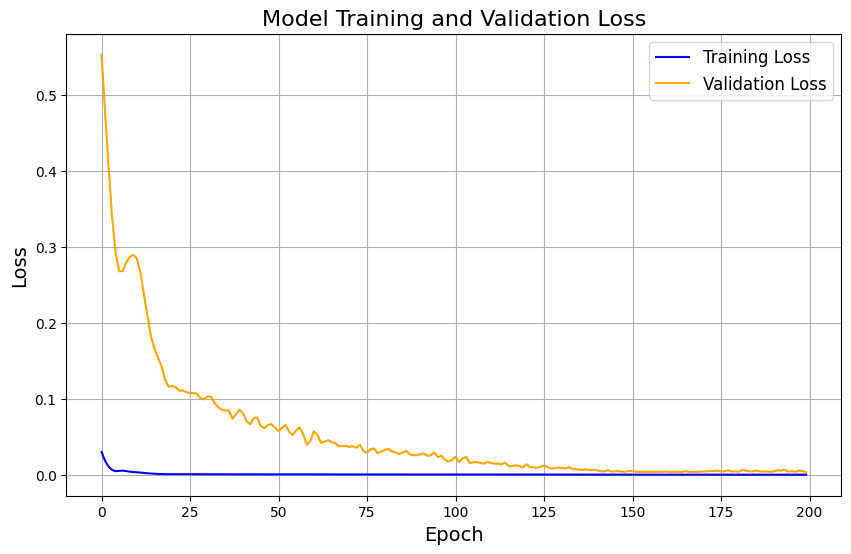

In [107]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [108]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [109]:
# Inverse transform predictions
train_predict_dummy = np.zeros((train_predict.shape[0], len(features) + 1))
test_predict_dummy = np.zeros((test_predict.shape[0], len(features) + 1))
train_predict_dummy[:, -1] = train_predict.flatten()
test_predict_dummy[:, -1] = test_predict.flatten()
train_predict = scaler.inverse_transform(train_predict_dummy)[:, -1]
test_predict = scaler.inverse_transform(test_predict_dummy)[:, -1]

# Prepare actual values
y_train_dummy = np.zeros((y_train.shape[0], len(features) + 1))
y_test_dummy = np.zeros((y_test.shape[0], len(features) + 1))
y_train_dummy[:, -1] = y_train
y_test_dummy[:, -1] = y_test
original_ytrain = scaler.inverse_transform(y_train_dummy)[:, -1]
original_ytest = scaler.inverse_transform(y_test_dummy)[:, -1]

print("\n10. Model Performance Metrics:")
metrics_train = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'MAPE %', 'R2', 'Explained Variance'],
    'Training': [
        math.sqrt(mean_squared_error(original_ytrain, train_predict)),
        mean_squared_error(original_ytrain, train_predict),
        mean_absolute_error(original_ytrain, train_predict),
        mean_absolute_percentage_error(original_ytrain, train_predict) * 100,
        r2_score(original_ytrain, train_predict),
        explained_variance_score(original_ytrain, train_predict)
    ]
})

metrics_test = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'MAPE %', 'R2', 'Explained Variance'],
    'Testing': [
        math.sqrt(mean_squared_error(original_ytest, test_predict)),
        mean_squared_error(original_ytest, test_predict),
        mean_absolute_error(original_ytest, test_predict),
        mean_absolute_percentage_error(original_ytest, test_predict) * 100,
        r2_score(original_ytest, test_predict),
        explained_variance_score(original_ytest, test_predict)
    ]
})

print("\nTraining Metrics:")
display(metrics_train.round(4))
print("\nTesting Metrics:")
display(metrics_test.round(4))


10. Model Performance Metrics:

Training Metrics:


,Metric,Training
0,RMSE,1.407508e+03
1,MSE,1.981080e+06
2,MAE,1.086652e+03
3,MAPE %,1.744500e+00
4,R2,8.942000e-01
5,Explained Variance,8.975000e-01



Testing Metrics:


,Metric,Testing
0,RMSE,3.349590e+03
1,MSE,1.121975e+07
2,MAE,2.542760e+03
3,MAPE %,2.701200e+00
4,R2,7.107000e-01
5,Explained Variance,7.113000e-01


In [111]:
print(f"\n CL: Close in Loss:\nSHORT(Actual close > Entry price)\nLONG(Actual close < Entry price)")
print(f"\n CP: Close in Profit:\nSHORT(Actual close < Entry price)\nLONG(Actual close > Entry price)")
print(f"\n TP: Take Profit:\nSHORT(Actual low < Predicted Close	)\nLONG(Actual close > Predicted Close)")


 CL: Close in Loss:
SHORT(Actual close > Entry price)
LONG(Actual close < Entry price)

 CP: Close in Profit:
SHORT(Actual close < Entry price)
LONG(Actual close > Entry price)

 TP: Take Profit:
SHORT(Actual low < Predicted Close	)
LONG(Actual close > Predicted Close)


In [114]:
# Define the number of rows to display
num_rows_to_display = 51

# Use numpy slicing to get the entry point prices (formerly previous close)
entry_point = np.roll(original_ytest, shift=1)  # Shift elements by 1 position
entry_point[0] = np.nan  # Set the first element to NaN because it has no previous value

# Create the comparison table
comparison_table = pd.DataFrame({
    'Date': date_column[training_size + time_step:-1].reset_index(drop=True)[-len(test_predict):],
    'Entry Point': entry_point[-len(test_predict):],  # Previous Candle Close
    'Predicted Close': test_predict,
    'Actual High': maindf['High'][training_size + time_step:-1].reset_index(drop=True)[-len(test_predict):],
    'Actual Close': original_ytest,
    'Actual Low': maindf['Low'][training_size + time_step:-1].reset_index(drop=True)[-len(test_predict):],
})

# Add a column for the "LONG" or "SHORT" label
comparison_table['Signal'] = np.where(
    comparison_table['Predicted Close'] > comparison_table['Entry Point'],
    'LONG',
    'SHORT'
)

# Add a column for the "Result" based on Signal, Actual Close, and Actual High/Low
comparison_table['Result'] = np.where(
    (comparison_table['Signal'] == 'SHORT') & (comparison_table['Actual Low'] <= comparison_table['Predicted Close']),
    'TP',  # Take Profit (Signal: SHORT, Actual Low <= Predicted Close)
    np.where(
        (comparison_table['Signal'] == 'LONG') & (comparison_table['Actual High'] >= comparison_table['Predicted Close']),
        'TP',  # Take Profit (Signal: LONG, Actual High >= Predicted Close)
        np.where(
            (comparison_table['Signal'] == 'SHORT') & (comparison_table['Actual Low'] > comparison_table['Predicted Close']),
            np.where(
                comparison_table['Actual Close'] < comparison_table['Entry Point'],
                'CP',  # Close in Profit (Signal: SHORT, Actual Low > Predicted Close and Actual Close < Entry Point)
                'CL'  # Close in Loss (Signal: SHORT, Actual Low > Predicted Close and Actual Close > Entry Point)
            ),
            np.where(
                (comparison_table['Signal'] == 'LONG') & (comparison_table['Actual High'] < comparison_table['Predicted Close']),
                np.where(
                    comparison_table['Actual Close'] > comparison_table['Entry Point'],
                    'CP',  # Close in Profit (Signal: LONG, Actual High < Predicted Close and Actual Close > Entry Point)
                    'CL'  # Close in Loss (Signal: LONG, Actual High < Predicted Close and Actual Close < Entry Point)
                ),
                'SL'  # Stop Loss (All other cases)
            )
        )
    )
)

# Calculate P Difference based on Result and Signal conditions
def calculate_p_difference(row):
    if row['Result'] == 'TP' and row['Signal'] == 'SHORT':
        return row['Entry Point'] - row['Actual Low']
    elif row['Result'] == 'TP' and row['Signal'] == 'LONG':
        return row['Actual High'] - row['Entry Point']
    elif row['Result'] == 'CP' and row['Signal'] == 'SHORT':
        return row['Entry Point'] - row['Actual Close']
    elif row['Result'] == 'CP' and row['Signal'] == 'LONG':
        return row['Actual Close'] - row['Entry Point']
    elif row['Result'] == 'CL' and row['Signal'] == 'SHORT':
        return row['Entry Point'] - row['Actual Close']
    elif row['Result'] == 'CL' and row['Signal'] == 'LONG':
        return row['Actual Close'] - row['Entry Point']
    else:
        return np.nan

comparison_table['P Difference'] = comparison_table.apply(calculate_p_difference, axis=1)

# Calculate Difference % based on P Difference and Entry Point
comparison_table['Difference %'] = (comparison_table['P Difference'] / comparison_table['Entry Point']) * 100

# Print the comparison table
print(f"\n11. Prediction Comparison (First {num_rows_to_display} rows):")
display(comparison_table.head(num_rows_to_display).round(2))



11. Prediction Comparison (First 51 rows):


,Date,Entry Point,Predicted Close,Actual High,Actual Close,Actual Low,Signal,Result,P Difference,Difference %
0,2024-11-06,NaN,68742.21,76420.0,75579.9,69272.7,SHORT,CL,NaN,NaN
1,2024-11-07,75579.9,74712.47,76900.0,75859.4,74450.0,SHORT,TP,1129.9,1.49
2,2024-11-08,75859.4,74482.72,77182.9,76482.2,75576.3,SHORT,CL,-622.8,-0.82
3,2024-11-09,76482.2,74966.11,76920.0,76675.1,75683.2,SHORT,CL,-192.9,-0.25
4,2024-11-10,76675.1,74643.25,81699.8,80410.0,76501.1,SHORT,CL,-3734.9,-4.87
5,2024-11-11,80410.0,79047.44,89800.0,88728.9,80261.2,SHORT,CL,-8318.9,-10.35
6,2024-11-12,88728.9,87685.84,90070.1,87972.0,85159.9,SHORT,TP,3569.0,4.02
7,2024-11-13,87972.0,87733.34,93421.1,90413.3,86180.0,SHORT,TP,1792.0,2.04
8,2024-11-14,90413.3,91410.39,91846.1,87382.7,86714.0,LONG,TP,1432.8,1.58
9,2024-11-15,87382.7,87806.33,91921.5,91074.6,87111.0,LONG,TP,4538.8,5.19


In [115]:
# Count the total trades hitting each result
result_counts = comparison_table['Result'].value_counts()

# Display the total number of trades
total_trades = len(comparison_table)

# Calculate the sum of P Difference and Difference % columns
total_p_difference = comparison_table['P Difference'].sum()
total_difference_percentage = comparison_table['Difference %'].sum()

# Calculate the win rate (TP + CP as wins, divided by total trades)
wins = result_counts.get('TP', 0) + result_counts.get('CP', 0)
win_rate = (wins / total_trades) * 100 if total_trades > 0 else 0

# Display the total trades and result counts
print(f"\nTotal Trades: {total_trades}")
print("\nTotal Trades in Each State:")
print(f"TP (Take Profit): {result_counts.get('TP', 0)}")
print(f"CP (Close in Profit): {result_counts.get('CP', 0)}")
print(f"CL (Close in Loss): {result_counts.get('CL', 0)}")
print(f"SL (Stop Loss): {result_counts.get('SL', 0)}")

# Display the summed values for P Difference and Difference %
print("\nSummed Values:")
print(f"Total P Difference: {total_p_difference:.2f}")
print(f"Total Difference %: {total_difference_percentage:.2f}")

# Display the win rate
print(f"\nWin Rate: {win_rate:.2f}%")



Total Trades: 72

Total Trades in Each State:
TP (Take Profit): 40
CP (Close in Profit): 8
CL (Close in Loss): 24
SL (Stop Loss): 0

Summed Values:
Total P Difference: 47704.00
Total Difference %: 49.54

Win Rate: 66.67%


In [116]:
# Create visualization
def plot_predictions(close_stock, train_predict, test_predict, date_column, time_step):
    trainPredictPlot = np.empty((len(close_stock), 1))
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step:len(train_predict)+time_step, 0] = train_predict

    testPredictPlot = np.empty((len(close_stock), 1))
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(time_step*2)+1:len(close_stock)-1, 0] = test_predict

    plotdf = pd.DataFrame({
        'Date': close_stock['Open Time'],
        'Original Close': close_stock['Adj Close'],
        'Train Predicted Close': trainPredictPlot.flatten(),
        'Test Predicted Close': testPredictPlot.flatten()
    })

    fig = px.line(plotdf, x='Date',
                  y=['Original Close', 'Train Predicted Close', 'Test Predicted Close'],
                  title='Original vs Predicted Close Price')
    fig.show()

plot_predictions(close_stock, train_predict, test_predict, date_column, time_step)


In [ ]:
model_save_directory = os.path.join(base_directory, 'FYP_Model_PipeLine')
model_save_path = os.path.join(model_save_directory, f"{model_name}.h5")  # Constructs the full save path
# Save the model
model.save(model_save_path)
print(f"\nModel saved successfully at: {model_save_path}")


Model saved successfully at: /content/drive/MyDrive/FYP_Model_PipeLine/BTC_1d.h5
